# Final Project

## Phase 1 - Work Plan:

This will describe the plan of attack to move forward on creating a adequate model to predict client churn rate.

In [1]:
import pandas as pd

In [2]:
df_con = pd.read_csv('/datasets/final_provider/contract.csv')
df_pers = pd.read_csv('/datasets/final_provider/personal.csv')
df_inter = pd.read_csv('/datasets/final_provider/internet.csv')
df_phone = pd.read_csv('/datasets/final_provider/phone.csv')

### Contract Data:

In [3]:
df_con.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


Contract Data Thougts:

So far looking at the contract data alone, it doesn't show anything obvious. 

One thing that peaked my interest was the "(automatic)" section to the PaymentMethod column. I would guess that the other payment options are not automatic and require a manual monthly payment installment. This could impact loyalty. 

### Personal Data:

In [4]:
df_pers.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


Personal Data Thougts:

This info shows gender, realtionship status, if they have dependents, and age "limited".

### Internet Data:

In [5]:
df_inter.head(10)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


Internet Data Thougts:

This data shows what services the client is using. Perhaps the more services they have the more likely they are willing to stay.

### Phone Data:

In [6]:
df_phone.head(10)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


Phone Data Thougts:

Shows if they carry multiple lines, perhaps this is conected to if they dependents, partners, or a mixture.

### Work Plan:

1. We need to import the data and do nesecary data cleaning and preprocessing. This includes merging the data, filling in missing values and removing duplicates.
2. Feature Engeniring. We will want to create new features when the data is merged and cleaned to then extract new insights that may impact if a cleint is more likely to stay or churn.
3. EDA. Dive into what other trends that could be extracted that isn't intialy expressed in the data.
4. Prepare for Model training, train and validate model, and tune models when need to yield the best result.

## Phase 2 - Work Plan Execution:

### 1. Initial Imports, Data Cleaing, and Preprocessing:

We need to import the data and do nesecary data cleaning and preprocessing. This includes merging the data, filling in missing values and removing duplicates.

Later thoughout the project there maybe times where we need to re-evalueate the data and make alterations, deductions, and or additions. Those will be addressed accordingly.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [9]:
df_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [10]:
df_pers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [11]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


1. First thought is to look for duplicates and missing data individually first then merge all the data. But, it maybe a better move to merge than deal with missing and duplicates then. 

- The issue is that in 2 df's there are 7043 entries and the other 2 have 6361 and 5517. This makes sense, for the desparity. Some people probably didn't use their phone service and some probably didn't use their intenet services either.

2. Second, I'd want to change the BeginDate column to datetime just so it can be translated later for calcualtions.

- The next issue is that EndDate, some of the end dates have no as an input cause they are still active. I will need to think of a solution for what would be the best replacement for that when we transfer this to datetime. Perhaps a missing value will help here.

In [12]:
df_con.duplicated().sum()

0

In [13]:
df_inter.duplicated().sum()

0

In [14]:
df_pers.duplicated().sum()

0

In [15]:
df_phone.duplicated().sum()

0

In [16]:
df_con['customerID'].duplicated().sum()

0

In [17]:
df_inter['customerID'].duplicated().sum()

0

In [18]:
df_pers['customerID'].duplicated().sum()

0

In [19]:
df_phone['customerID'].duplicated().sum()

0

Duplicates:
- When looking for duplicates in the individual dataframes I found no duplicates.
- When looking for duplicated customerID there were no duplicates either.
- This would most likely mean that when merging all the data on customerID we shouldn't have to many issues

Missing Values:
- In all the dataframes there is no missing values. There will be missing values when I merge all the data since some custmers didn't use both services, internet and phone.

In [20]:
df_con['BeginDate'] = pd.to_datetime(df_con['BeginDate'])
df_con['EndDate'] = pd.to_datetime(df_con['EndDate'],errors='coerce')
df_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 440.3+ KB


In [21]:
((7043-1869)/7043)*100

73.4630129206304

Converting to datetime:

- Making the BeginDate and EndDate columns to datetime created missing values in the end date column.
- With the remaining 1869 values being non-null this would show the clients that left the service.
- Showing that most of the data is clients that still have a service with the company. Aproxamently 73% remain clients.

In [22]:
df_con_pers = pd.merge(df_con,df_pers,on='customerID',how='outer')
df_con_pers_inter = pd.merge(df_con_pers,df_inter,on='customerID',how='outer')
df_merged = pd.merge(df_con_pers_inter,df_phone,on='customerID',how='outer')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   5517 non-null   object        
 13  OnlineSecurity    5517 non-null   object        
 14  OnlineBackup      5517 n

In [23]:
df_merged.columns = df_merged.columns.str.lower()

Merged Data:
- I decided to merge the data into a single data frame so that later down the line training models and creating new columns will be more effecient.
- I changed the columns to be all in lower case for ease of use.

In [24]:
df_merged['autopayment'] = df_merged['paymentmethod'].str.contains(r"\(automatic\)",case=False).map({True:'Automatic',False:'Manual'})

In [25]:
df_merged['durationdays'] = df_merged['enddate']-df_merged['begindate']

Data Engineering:
- I created two more columns that would help find new insights and help with the models. autopayment and durationdays.
- These could reveal average time a client stays if the do leave and if automatic payments vs manual payments imapcats if they stay or not.

In [26]:
df_merged['totalcharges'] = pd.to_numeric(df_merged['totalcharges'],errors='coerce')

In [27]:
df_merged[df_merged['totalcharges'].isna()]

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender,seniorcitizen,...,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines,autopayment,durationdays
488,4472-LVYGI,2020-02-01,NaT,Two year,Yes,Bank transfer (automatic),52.55,NaN,Female,0,...,DSL,Yes,No,Yes,Yes,Yes,No,NaN,Automatic,NaT
753,3115-CZMZD,2020-02-01,NaT,Two year,No,Mailed check,20.25,NaN,Male,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Manual,NaT
936,5709-LVOEQ,2020-02-01,NaT,Two year,No,Mailed check,80.85,NaN,Female,0,...,DSL,Yes,Yes,Yes,No,Yes,Yes,No,Manual,NaT
1082,4367-NUYAO,2020-02-01,NaT,Two year,No,Mailed check,25.75,NaN,Male,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Manual,NaT
1340,1371-DWPAZ,2020-02-01,NaT,Two year,No,Credit card (automatic),56.05,NaN,Female,0,...,DSL,Yes,Yes,Yes,Yes,Yes,No,NaN,Automatic,NaT
3331,7644-OMVMY,2020-02-01,NaT,Two year,No,Mailed check,19.85,NaN,Male,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Manual,NaT
3826,3213-VVOLG,2020-02-01,NaT,Two year,No,Mailed check,25.35,NaN,Male,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Manual,NaT
4380,2520-SGTTA,2020-02-01,NaT,Two year,No,Mailed check,20.00,NaN,Female,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Manual,NaT
5218,2923-ARZLG,2020-02-01,NaT,One year,Yes,Mailed check,19.70,NaN,Male,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Manual,NaT
6670,4075-WKNIU,2020-02-01,NaT,Two year,No,Mailed check,73.35,NaN,Female,0,...,DSL,No,Yes,Yes,Yes,Yes,No,Yes,Manual,NaT


Missing Data:
- In the total charges column I discoved some missing data and decided to keep it missing due to what relavnce it had to the type of contract they had and when they started.
- The contract has been complete and the sign up was so fresh that it wouldn't be fair to give them a total charge input yet.
- And on top of that it makes up such a small fraction of the data it won't influence anything.

### 2. Exploratory Data Analysis (EDA):

Moving on to finding insights on the data and creating visuals to show what we can observe about different trends hidden in the data.

#### A. Begining Dates:

In [28]:
begindate_count = df_merged['begindate'].value_counts().sort_index()

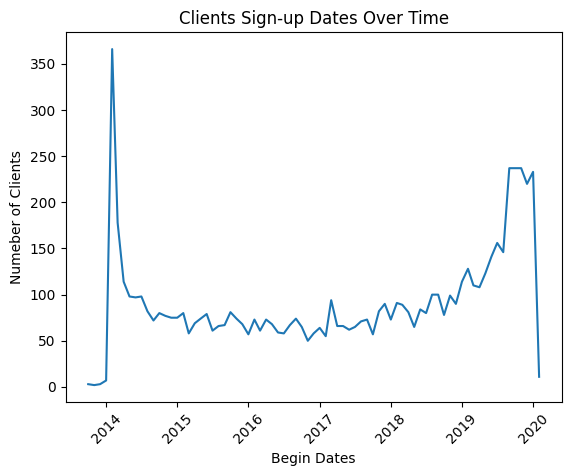

In [29]:
plt.plot(begindate_count)
plt.title('Clients Sign-up Dates Over Time')
plt.xlabel('Begin Dates')
plt.ylabel('Numeber of Clients')
plt.xticks(rotation=45)
plt.show()

In [30]:
begindate_count.head(20)

2013-10-01      3
2013-11-01      2
2013-12-01      3
2014-01-01      7
2014-02-01    366
2014-03-01    178
2014-04-01    114
2014-05-01     98
2014-06-01     97
2014-07-01     98
2014-08-01     82
2014-09-01     72
2014-10-01     80
2014-11-01     77
2014-12-01     75
2015-01-01     75
2015-02-01     80
2015-03-01     58
2015-04-01     69
2015-05-01     74
Name: begindate, dtype: int64

In [31]:
begindate_count.tail(20)

2018-07-01     80
2018-08-01    100
2018-09-01    100
2018-10-01     78
2018-11-01     99
2018-12-01     90
2019-01-01    114
2019-02-01    128
2019-03-01    110
2019-04-01    108
2019-05-01    123
2019-06-01    141
2019-07-01    156
2019-08-01    146
2019-09-01    237
2019-10-01    237
2019-11-01    237
2019-12-01    220
2020-01-01    233
2020-02-01     11
Name: begindate, dtype: int64

##### Line Plot of Begining Dates Over Time:

The data shows that the over the months and years, around 2014 and 2020, had the biggest spike of signups for the platform. 

Between then they had steady signups through 2015-2019.

The data also has extremes in the data where there we no signups for a couple days at the begining of data colection and the end of data. 

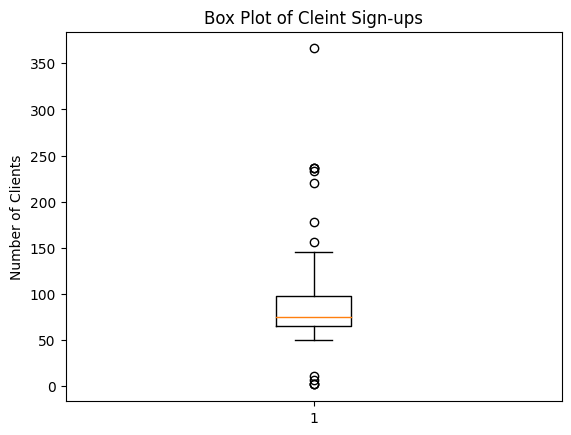

In [32]:
plt.boxplot(begindate_count)
plt.title('Box Plot of Cleint Sign-ups')
plt.ylabel("Number of Clients")
plt.show()

In [33]:
begindate_count.describe()

count     77.000000
mean      91.467532
std       58.409531
min        2.000000
25%       65.000000
50%       75.000000
75%       98.000000
max      366.000000
Name: begindate, dtype: float64

##### Box Plot Sign-ups:

The average of data signups were 91 and the mode is 75.

The reason for the high average is due to the high influxes of signups in 2014 and 2020.

#### B. End Dates:

In [34]:
enddate_count = df_merged['enddate'].value_counts().sort_index()

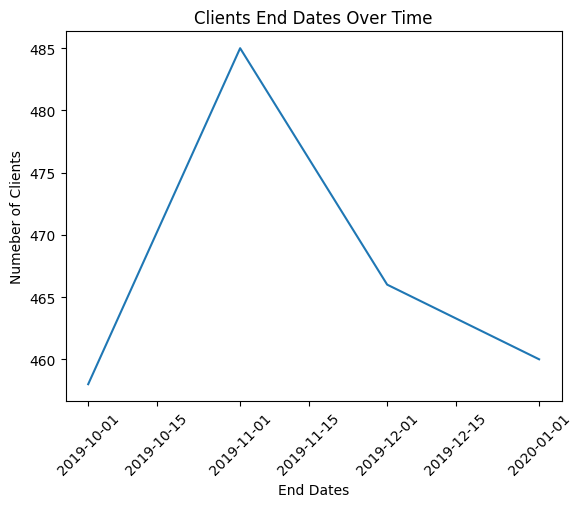

In [35]:
plt.plot(enddate_count)
plt.title('Clients End Dates Over Time')
plt.xlabel('End Dates')
plt.ylabel('Numeber of Clients')
plt.xticks(rotation=45)
plt.show()

In [36]:
enddate_count

2019-10-01    458
2019-11-01    485
2019-12-01    466
2020-01-01    460
Name: enddate, dtype: int64

In [37]:
enddate_count.describe()

count      4.000000
mean     467.250000
std       12.311918
min      458.000000
25%      459.500000
50%      463.000000
75%      470.750000
max      485.000000
Name: enddate, dtype: float64

In [38]:
group_begindate_by_enddate = df_merged.groupby('begindate')['enddate'].count()

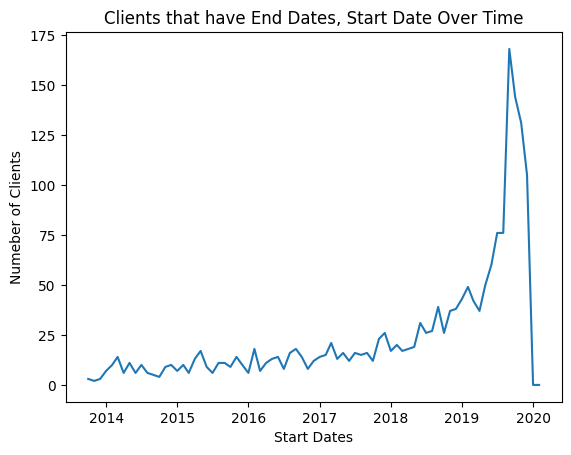

In [39]:
plt.plot(group_begindate_by_enddate)
plt.title('Clients that have End Dates, Start Date Over Time')
plt.xlabel('Start Dates')
plt.ylabel('Numeber of Clients')
plt.show()

##### End Date Data:

It's interesting to see that there are not many months that have end dates over time like the sign-ups have.

The data has 4 months that poeple had actually stopped their service with the company.

The churn rate is a lot higher than I had expected. I thought it would have been similar to the sign-ups were their was a steady rate for times and periods of increase or decrease. It shows that there are alot of clients leaving all in the span of a couple months. 

This could be due to the contracts they had for sign-up and they decided not to continue thier service.

Also sign-up dates for the clients who left may not reflect that as truth, the sing-ups follow a similar trend to the begin date data, without the huge influx in 2014.

So this shows that a huge influx of cleints started the service and ended the service quickly around 2019-2020.

In [40]:
inter_list = list(df_inter.columns.str.lower())
phone_list = list(df_phone.columns.str.lower())

#### C. Churned Data:

In [41]:
df_churned = df_merged[df_merged['enddate'].notna()]

##### - Bar Graphs:

In [42]:
type_counts = df_merged['type'].value_counts()
churned_type_counts = df_churned['type'].value_counts()

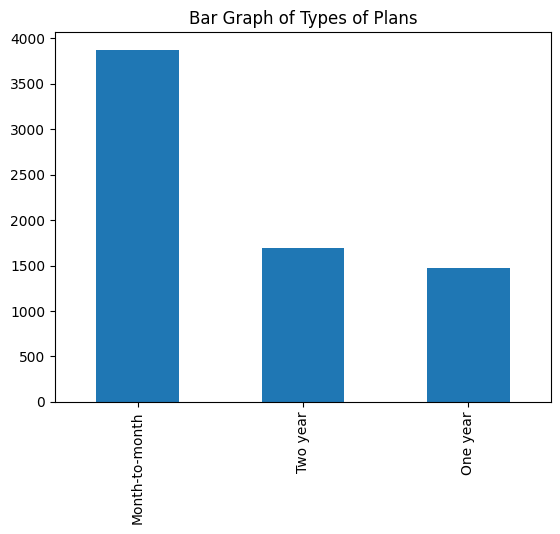

In [43]:
type_counts.plot(kind='bar')
plt.title('Bar Graph of Types of Plans')
plt.show()

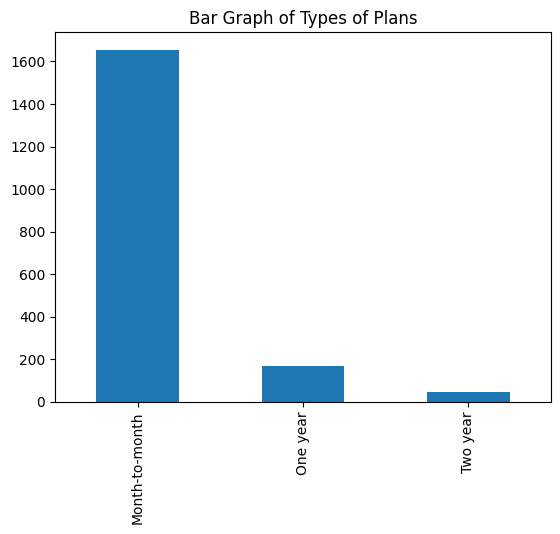

In [44]:
churned_type_counts.plot(kind='bar')
plt.title('Bar Graph of Types of Plans')
plt.show()

In [45]:
print('All Contract Types:')
print(type_counts)
print()
print('Churned Contract Types:')
print(churned_type_counts)

All Contract Types:
Month-to-month    3875
Two year          1695
One year          1473
Name: type, dtype: int64

Churned Contract Types:
Month-to-month    1655
One year           166
Two year            48
Name: type, dtype: int64


Types of Plans:
- There is a huge desparity in what plans have been chosen, Month to month leads the pack while one and two year have very little engagement.
- This makes sense cause a month to month plan is probably an easier plan to itiatate someone into the services other than an one to two year contract.
- It looks like that most of the people who had churned were signed up on a month to month contract rather than a one or two year contract.

In [46]:
autopayment_counts = df_merged['autopayment'].value_counts()
churned_autopayment_counts = df_churned['autopayment'].value_counts()

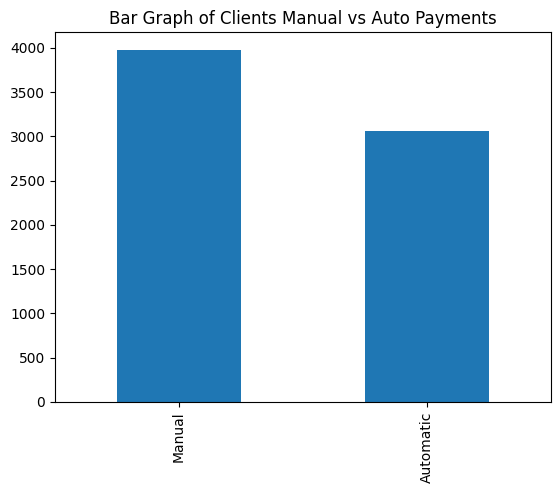

In [47]:
autopayment_counts.plot(kind='bar')
plt.title('Bar Graph of Clients Manual vs Auto Payments')
plt.show()

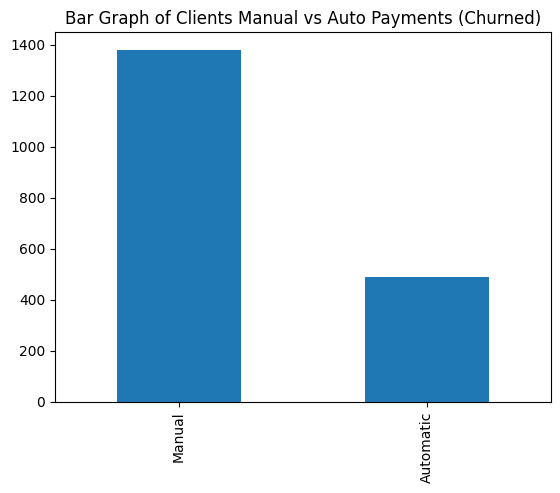

In [48]:
churned_autopayment_counts.plot(kind='bar')
plt.title('Bar Graph of Clients Manual vs Auto Payments (Churned)')
plt.show()

In [49]:
print('Auto Vs Manual Payments:')
print(autopayment_counts)
print()
print('Auto Vs Manual Payments (Churned):')
print(churned_autopayment_counts)

Auto Vs Manual Payments:
Manual       3977
Automatic    3066
Name: autopayment, dtype: int64

Auto Vs Manual Payments (Churned):
Manual       1379
Automatic     490
Name: autopayment, dtype: int64


Manual vs Auto Payments:
- The most of what churned were manual payment options. About 1/3 of people who payed manually ended up leaving.
- This would make sense cause manual payment is not a convenient as auto payments

In [50]:
inter_serv_count = df_merged['internetservice'].value_counts()
churned_inter_serv_count = df_churned['internetservice'].value_counts()

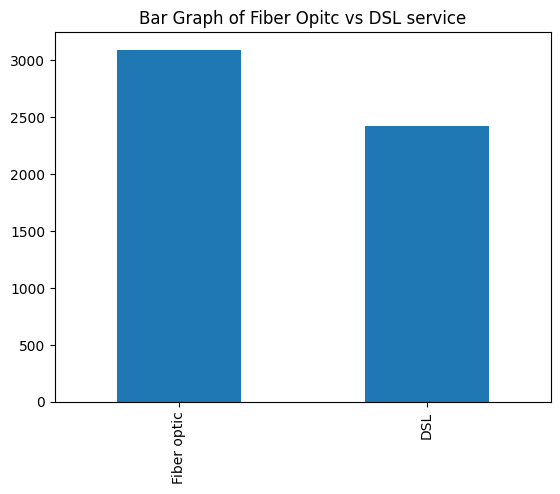

In [51]:
inter_serv_count.plot(kind='bar')
plt.title('Bar Graph of Fiber Opitc vs DSL service')
plt.show()

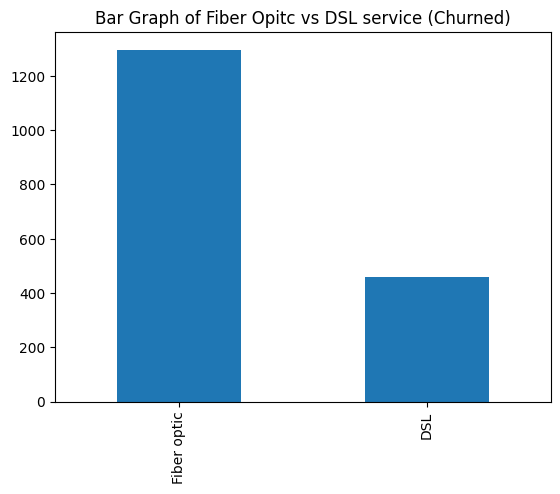

In [52]:
churned_inter_serv_count.plot(kind='bar')
plt.title('Bar Graph of Fiber Opitc vs DSL service (Churned)')
plt.show()

In [53]:
print('Fiber Optic Vs DSL:')
print(inter_serv_count)
print()
print('Fiber Optic Vs DSL (Churned):')
print(churned_inter_serv_count)

Fiber Optic Vs DSL:
Fiber optic    3096
DSL            2421
Name: internetservice, dtype: int64

Fiber Optic Vs DSL (Churned):
Fiber optic    1297
DSL             459
Name: internetservice, dtype: int64


Internet Services:
- With a similar amount of total users on Fiber Optice and DSL, many of the fiber optic clients churned.
- Almost 1/2 of the fiber optic clients churned.

In [54]:
gender_count = df_merged['gender'].value_counts()
churned_gender_count = df_churned['gender'].value_counts()

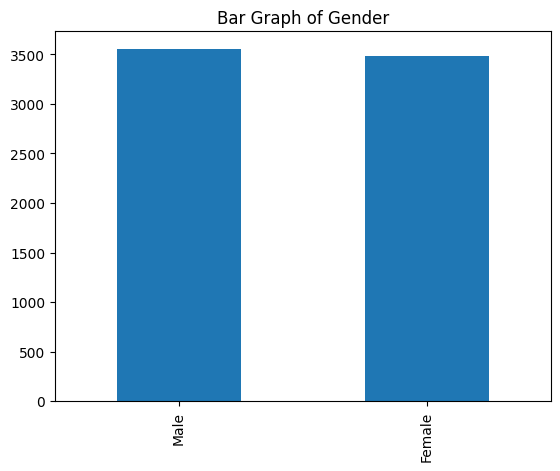

In [55]:
gender_count.plot(kind='bar')
plt.title('Bar Graph of Gender')
plt.show()

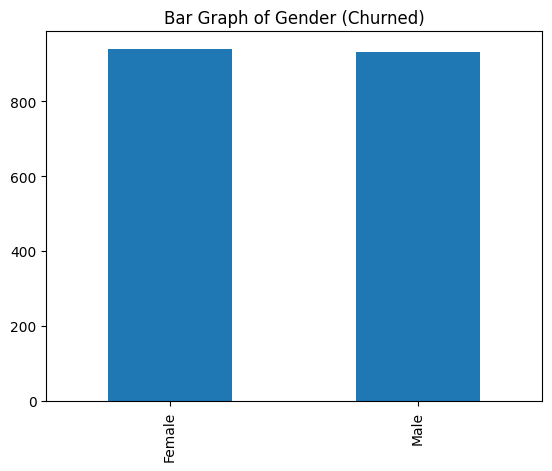

In [56]:
churned_gender_count.plot(kind='bar')
plt.title('Bar Graph of Gender (Churned)')
plt.show()

In [57]:
print('Male Vs Female:')
print(gender_count)
print()
print('Male Vs Female (Churned):')
print(churned_gender_count)

Male Vs Female:
Male      3555
Female    3488
Name: gender, dtype: int64

Male Vs Female (Churned):
Female    939
Male      930
Name: gender, dtype: int64


Gender:
- Another suprising metric is how even the amount gender demographic is between the services.

##### - Monthly and Total Charge Data:

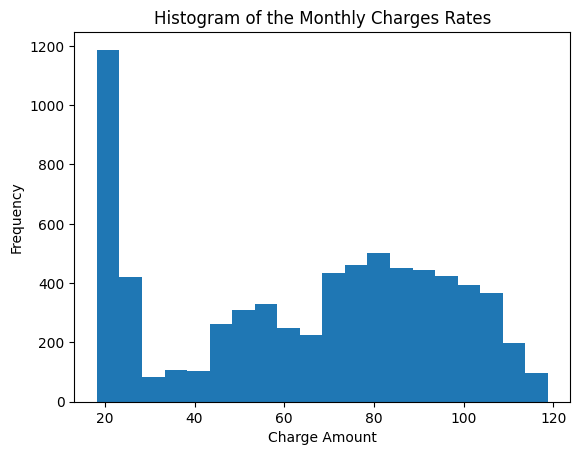

In [58]:

df_merged['monthlycharges'].plot(kind='hist',bins=20)
plt.title('Histogram of the Monthly Charges Rates')
plt.xlabel('Charge Amount')
plt.show()


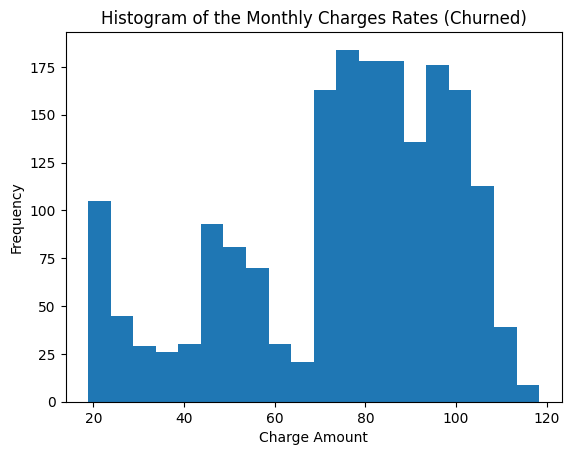

In [59]:
df_churned['monthlycharges'].plot(kind='hist',bins=20)
plt.title('Histogram of the Monthly Charges Rates (Churned)')
plt.xlabel('Charge Amount')
plt.show()

In [60]:
print('Mode of All Monthly Payments:',df_merged['monthlycharges'].mode())
print()
print('Mode of All Churned Monthly Payments:',df_churned['monthlycharges'].mode())

Mode of All Monthly Payments: 0    20.05
dtype: float64

Mode of All Churned Monthly Payments: 0    74.4
dtype: float64


In [61]:
df_merged['monthlycharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthlycharges, dtype: float64

In [62]:
df_churned['monthlycharges'].describe()

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: monthlycharges, dtype: float64

Mothly Charges:
- When we look at all data we can see there is a huge spike near 20 and then more balanced activity beteween the 40-100 mark.
- When we look at the churned date we can see more clients paying near the 80-100 mark.

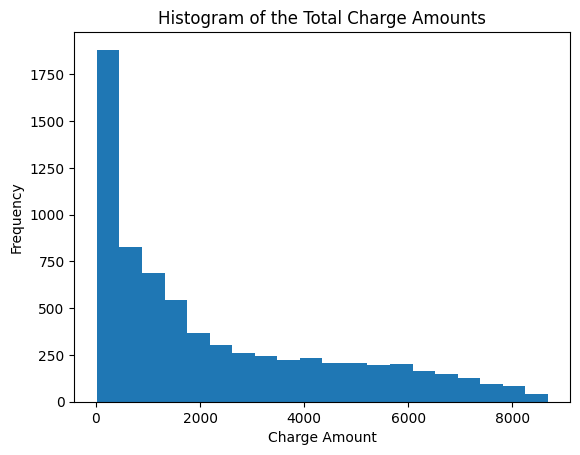

In [63]:
df_merged['totalcharges'].plot(kind='hist',bins=20)
plt.title('Histogram of the Total Charge Amounts')
plt.xlabel('Charge Amount')
plt.show()

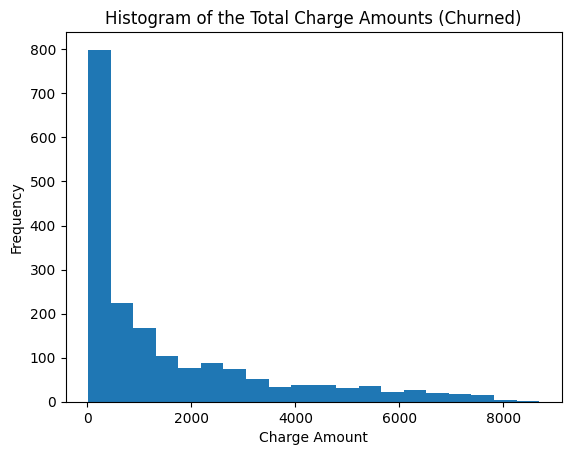

In [64]:
df_churned['totalcharges'].plot(kind='hist',bins=20)
plt.title('Histogram of the Total Charge Amounts (Churned)')
plt.xlabel('Charge Amount')
plt.show()

In [65]:
df_merged['totalcharges'].mode()
print('Mode of All Total Payments:',df_merged['totalcharges'].mode())
print()
print('Mode of All Churned Total Payments:',df_churned['totalcharges'].mode())


Mode of All Total Payments: 0    20.2
dtype: float64

Mode of All Churned Total Payments: 0    20.2
dtype: float64


In [66]:
df_merged['totalcharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: totalcharges, dtype: float64

In [67]:
df_churned['totalcharges'].describe()

count    1869.000000
mean     1531.796094
std      1890.822994
min        18.850000
25%       134.500000
50%       703.550000
75%      2331.300000
max      8684.800000
Name: totalcharges, dtype: float64

Total Charges:
- With the total charge amounts we can see the the data has a right skewed trend with most total charges being at the low end with both the churned and total data.
- The quartiles are a bit different but the overall shape of the data is close to the total.

#### EDA Conclusion:

When looking through the start and end dates we can notice trends to when certian clients coming in and then deciding to leave. And, partnering this with the information with the month to month contracts and yearly contracts, we can see a corelation for the spike of clients who joined and left very quickly. A lot of clients who started in 2019-2020 did not stay for very long and were most likely on the month to month program. This would also be seen in the total chrages amount meaning it must be something basic that they were in. Not a multiple service kind of agreement.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
Good intermediate findings from your EDA here. 
</div>

### 3. Model Preperations, Training, Validating and Testing:

#### A. Data Preperations and Splitting for Model:

In [68]:
df_merged['totalcharges'].fillna(0,inplace=True)

In [69]:
df_merged[df_merged['totalcharges'].isna()]

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender,seniorcitizen,...,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines,autopayment,durationdays


In [70]:
df_merged['churned'] = df_merged['enddate'].notna().astype(int)
(df_merged['churned']==1).value_counts()

False    5174
True     1869
Name: churned, dtype: int64

- I wanted to check to see if the '1' inputs matched the count of the churned data and it does.
- The missing data will cause errors in the model training process, filling the data with 0's instead cause this is accurate and it won't cause error issues.

In [71]:
encode_columns = ['type','paperlessbilling','paymentmethod','gender','partner','dependents',
 'internetservice','onlinesecurity','onlinebackup','deviceprotection','techsupport',
'streamingtv','streamingmovies','multiplelines','autopayment']

In [72]:
df_encoded = pd.get_dummies(df_merged,columns=encode_columns,drop_first=True)
df_encoded = df_encoded.drop(columns=['enddate','customerid','begindate','durationdays'])

- I encoded and kept the relavent data for targets and features.

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score

In [74]:
feat = df_encoded.drop(columns=['churned'])
targ = df_encoded['churned']

In [75]:
feat_temp, feat_test, targ_temp, targ_test = train_test_split(feat, targ, test_size=0.2, random_state=12345, stratify=targ)

In [76]:
feat_train, feat_val, targ_train, targ_val = train_test_split(feat_temp, targ_temp, test_size=0.25, random_state=12345, stratify=targ_temp)

In [77]:
print("Train:", feat_train.shape, targ_train.shape)
print("Validation:", feat_val.shape, targ_val.shape)
print("Test:", feat_test.shape, targ_test.shape)

Train: (4225, 21) (4225,)
Validation: (1409, 21) (1409,)
Test: (1409, 21) (1409,)


- Splitting the data into features and targets for the training, validation and test sets

In [78]:
scaler = StandardScaler()
feat_train_scaled = scaler.fit_transform(feat_train)
feat_val_scaled = scaler.transform(feat_val)
feat_test_scaled = scaler.transform(feat_test)

- Scaled the data so that it would train better models.

#### B. Logistic Regression Model:

In [79]:
lr_model = LogisticRegression(random_state=12345)
lr_model.fit(feat_train_scaled,targ_train)

LogisticRegression(random_state=12345)

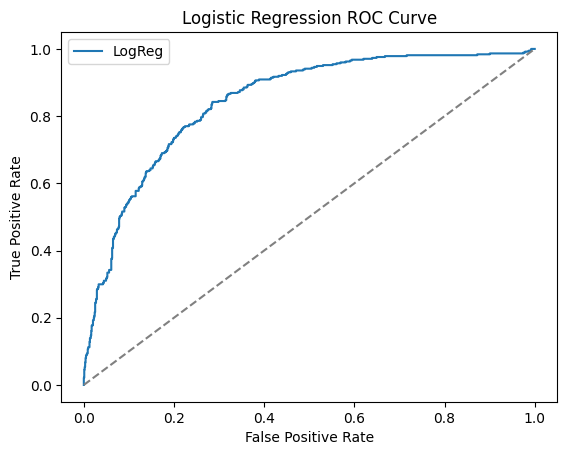

Validation Performance:
AUC-ROC: 0.8446239892531453
Confusion Matrix:
[[952  83]
 [186 188]]
Accuracy Score: 0.8090844570617459


In [141]:
lr_pred_val = lr_model.predict(feat_val_scaled)

lr_prob_val = lr_model.predict_proba(feat_val_scaled)
lr_prob_val_churn = lr_prob_val[:, 1]

fpr, tpr, thresholds = roc_curve(targ_val, lr_prob_val_churn)

plt.plot(fpr, tpr, label='LogReg')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.show()

auc = roc_auc_score(targ_val, lr_prob_val_churn)

print("Validation Performance:")
print('='*20)
print("AUC-ROC:", auc)
print('Confusion Matrix:')
print(confusion_matrix(targ_val, lr_pred_val))
print('Accuracy Score:',accuracy_score(targ_val, lr_pred_val))


#### C. LightGBM Classifier Model:

In [91]:
import lightgbm as lgb

##### Scaled Data:

In [97]:
lgbm_model = lgb.LGBMClassifier(objective='binary',metric='auc',num_leaves=31,learning_rate=.05,n_esitmators=100,random_state=12345)

In [133]:
lgbm_model.fit(feat_train_scaled,targ_train,eval_set=[(feat_val,targ_val)],eval_metric='auc')

[LightGBM] [Warning] Unknown parameter: n_esitmators
[1]	valid_0's auc: 0.757558
[2]	valid_0's auc: 0.775247
[3]	valid_0's auc: 0.766225
[4]	valid_0's auc: 0.767023
[5]	valid_0's auc: 0.778599
[6]	valid_0's auc: 0.764843
[7]	valid_0's auc: 0.760027
[8]	valid_0's auc: 0.76937
[9]	valid_0's auc: 0.739191
[10]	valid_0's auc: 0.741404
[11]	valid_0's auc: 0.747684
[12]	valid_0's auc: 0.743186
[13]	valid_0's auc: 0.740017
[14]	valid_0's auc: 0.742051
[15]	valid_0's auc: 0.749965
[16]	valid_0's auc: 0.752614
[17]	valid_0's auc: 0.750047
[18]	valid_0's auc: 0.741335
[19]	valid_0's auc: 0.734084
[20]	valid_0's auc: 0.730565
[21]	valid_0's auc: 0.741666
[22]	valid_0's auc: 0.697777
[23]	valid_0's auc: 0.740865
[24]	valid_0's auc: 0.751606
[25]	valid_0's auc: 0.770712
[26]	valid_0's auc: 0.764388
[27]	valid_0's auc: 0.75929
[28]	valid_0's auc: 0.769502
[29]	valid_0's auc: 0.770047
[30]	valid_0's auc: 0.770544
[31]	valid_0's auc: 0.769773
[32]	valid_0's auc: 0.764989
[33]	valid_0's auc: 0.761796
[

LGBMClassifier(learning_rate=0.05, metric='auc', n_esitmators=100,
               objective='binary', random_state=12345)

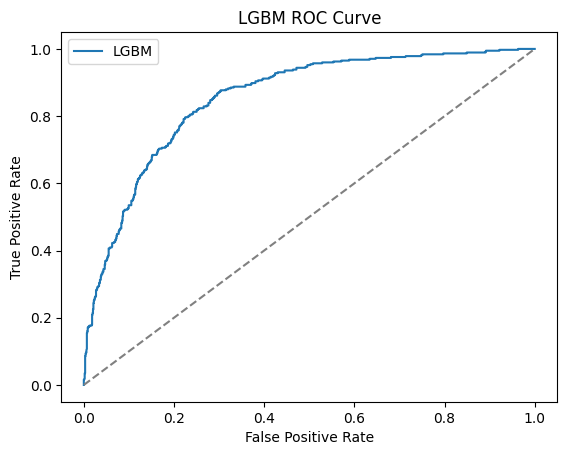

Validation Performance:
AUC-ROC: 0.8539034849776539
Confusion Matrix:
[[932 103]
 [181 193]]
Accuracy Score: 0.7984386089425124


In [136]:
lgbm_pred_val = lgbm_model.predict(feat_val_scaled)

lgbm_prob_val = lgbm_model.predict_proba(feat_val_scaled)
lgbm_prob_val_churn = lgbm_prob_val[:, 1]

fpr, tpr, thresholds = roc_curve(targ_val, prob_val_churn)

plt.plot(fpr, tpr, label='LGBM')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LGBM ROC Curve')
plt.legend()
plt.show()

auc = roc_auc_score(targ_val, lgbm_prob_val_churn)

print("Validation Performance:")
print('='*20)
print("AUC-ROC:", auc)
print('Confusion Matrix:')
print(confusion_matrix(targ_val, lgbm_pred_val))
print('Accuracy Score:',accuracy_score(targ_val, lgbm_pred_val))

##### Non Scaled Data:

In [120]:
lgbm2_model = lgb.LGBMClassifier(objective='binary',metric='auc',num_leaves=25,learning_rate=.05,n_esitmators=100,random_state=12345)

In [121]:
lgbm2_model.fit(feat_train,targ_train,eval_set=[(feat_val,targ_val)],eval_metric='auc')

[1]	valid_0's auc: 0.833732
[2]	valid_0's auc: 0.83566
[3]	valid_0's auc: 0.840307
[4]	valid_0's auc: 0.845271
[5]	valid_0's auc: 0.846662
[6]	valid_0's auc: 0.848144
[7]	valid_0's auc: 0.848896
[8]	valid_0's auc: 0.848952
[9]	valid_0's auc: 0.848108
[10]	valid_0's auc: 0.848761
[11]	valid_0's auc: 0.849288
[12]	valid_0's auc: 0.849321
[13]	valid_0's auc: 0.849687
[14]	valid_0's auc: 0.849557
[15]	valid_0's auc: 0.849437
[16]	valid_0's auc: 0.849859
[17]	valid_0's auc: 0.849519
[18]	valid_0's auc: 0.849903
[19]	valid_0's auc: 0.850169
[20]	valid_0's auc: 0.850895
[21]	valid_0's auc: 0.85139
[22]	valid_0's auc: 0.85151
[23]	valid_0's auc: 0.851959
[24]	valid_0's auc: 0.851966
[25]	valid_0's auc: 0.8523
[26]	valid_0's auc: 0.852264
[27]	valid_0's auc: 0.852233
[28]	valid_0's auc: 0.852817
[29]	valid_0's auc: 0.852955
[30]	valid_0's auc: 0.853059
[31]	valid_0's auc: 0.853358
[32]	valid_0's auc: 0.853601
[33]	valid_0's auc: 0.853271
[34]	valid_0's auc: 0.853533
[35]	valid_0's auc: 0.853777

LGBMClassifier(learning_rate=0.05, metric='auc', n_esitmators=100,
               num_leaves=25, objective='binary', random_state=12345)

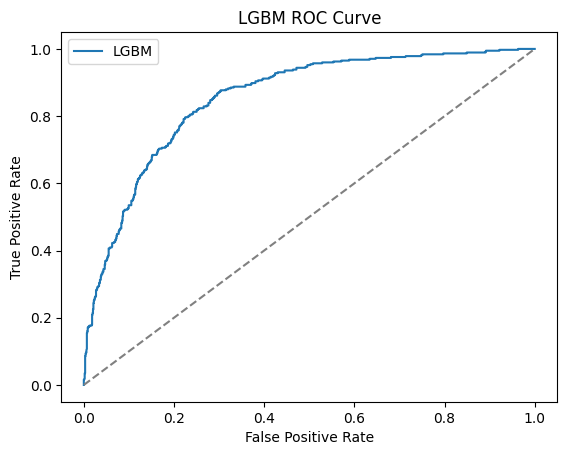

Validation Performance:
AUC-ROC: 0.8539034849776539
Confusion Matrix:
[[933 102]
 [178 196]]
Accuracy Score: 0.801277501774308


In [142]:
lgbm2_pred_val = lgbm2_model.predict(feat_val)

lgbm2_prob_val = lgbm2_model.predict_proba(feat_val)
lgbm2_prob_val_churn = lgbm2_prob_val[:, 1]

fpr, tpr, thresholds = roc_curve(targ_val, lgbm2_prob_val_churn)

plt.plot(fpr, tpr, label='LGBM')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LGBM ROC Curve')
plt.legend()
plt.show()

auc = roc_auc_score(targ_val, lgbm2_prob_val_churn)

print("Validation Performance:")
print('='*20)
print("AUC-ROC:", auc)
print('Confusion Matrix:')
print(confusion_matrix(targ_val, lgbm2_pred_val))
print('Accuracy Score:',accuracy_score(targ_val, lgbm2_pred_val))

Training and Validation Conclusions:
- The Logistic Regression shows a roc-auc of .82
- The LGBM Model shows a roc-auc of .85 for both the scaled and non scaled data

#### D. Test Set Performace:

##### Logistic Regression:

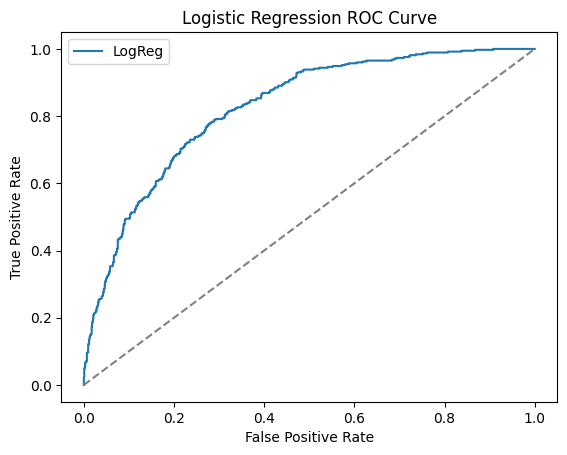

Validation Performance:
AUC-ROC: 0.8248327262393759
Confusion Matrix:
[[917 118]
 [178 196]]
Accuracy Score: 0.7899219304471257


In [143]:
lr_pred_test = lr_model.predict(feat_test_scaled)

lr_prob_test = lr_model.predict_proba(feat_test_scaled)
lr_prob_test_churn = lr_prob_test[:, 1]

fpr, tpr, thresholds = roc_curve(targ_test, lr_prob_test_churn)

plt.plot(fpr, tpr, label='LogReg')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.show()

auc = roc_auc_score(targ_test, lr_prob_test_churn)

print("Validation Performance:")
print('='*20)
print("AUC-ROC:", auc)
print('Confusion Matrix:')
print(confusion_matrix(targ_test, lr_pred_test))
print('Accuracy Score:',accuracy_score(targ_test, lr_pred_test))


##### LGBM Model:

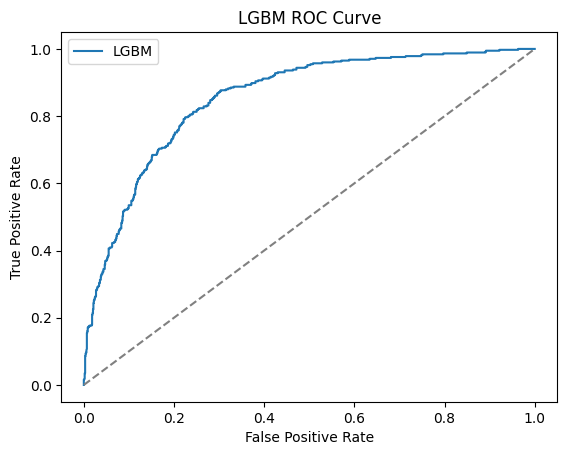

Validation Performance:
AUC-ROC: 0.8539034849776539
Confusion Matrix:
[[933 102]
 [178 196]]
Accuracy Score: 0.801277501774308


In [144]:
lgbm2_pred_test = lgbm2_model.predict(feat_test)

lgbm2_prob_test = lgbm2_model.predict_proba(feat_test)
lgbm2_prob_test_churn = lgbm2_prob_test[:, 1]

fpr, tpr, thresholds = roc_curve(targ_val, lgbm2_prob_val_churn)

plt.plot(fpr, tpr, label='LGBM')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LGBM ROC Curve')
plt.legend()
plt.show()

auc = roc_auc_score(targ_val, lgbm2_prob_val_churn)

print("Validation Performance:")
print('='*20)
print("AUC-ROC:", auc)
print('Confusion Matrix:')
print(confusion_matrix(targ_val, lgbm2_pred_val))
print('Accuracy Score:',accuracy_score(targ_val, lgbm2_pred_val))


In [ ]:
<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
Very nice job, good model pipeline and inference output. Only thing that you can and should elaborate on is which model is the best, feel free to highlight that more. 
</div>

##### Conclusion:
For the final model it should be the LGBM2 model. It shows the better auc-roc score along with a good accuracy score. 

I included a confusion matrix in the evaluation metrics to show about how many false positive and negatives we are showing in either model.

With the amount of false postive the model wont be able to save all cleints who decide to leave, but we will be able to find a good amount.

If we plan on retaining customers we will reatian a great amount and it won't hurt to give clients who may fall under false negatives for the discounts if that ends up being the case.